In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
class LinearRegression():
	"""
    Parameters:
    -----------
    n_iterations: The number of training iterations the algorithm will tune the weights for.
    learning_rate: The step length that will be used when updating the weights.
    """
	def __init__(self, n_iterations = 1000, learning_rate = 0.01):
		self.n_iterations = n_iterations
		self.learning_rate = learning_rate
		self.w = None
		self.mse = 0
	
	def init_weight(self, n_features):
		# Init weights all zero values
		self.w = np.zeros(n_features).reshape(-1, 1)
		
	def fit(self, X, y):
	
		# Insert one more column value 1 for bias
		X = np.insert(X, 0, 1, axis=1)
		
		n_samples, n_features = X.shape
		
		self.training_errors = []
		self.init_weight(n_features=X.shape[1])
		
		# Do gradient descent for n_iterations
		for i in range(self.n_iterations+1):
		
			#Calculate y prediction
			y_pred = np.dot(X, self.w)
			
			# Calculate Gradient Descent for Mean Squared Error
			self.mse = np.mean(0.5 * (y - y_pred)**2)

			grad = (1/n_samples) * np.dot(X.T, (y_pred-y))
				
			# Update weights
			self.w -= self.learning_rate * grad
				
		
	def predict(self, X):
		X = np.insert(X, 0, 1, axis=1)
		y_pred = X.dot(self.w)
		return y_pred
		

In [3]:
np.random.seed(3)

In [4]:
df = pd.read_csv("Salary.csv")

# Get input values
X = np.array(df['YearsExperience']).reshape(-1, 1)

# Get output values
y = np.array(df['Salary']).reshape(-1, 1)

In [5]:
# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

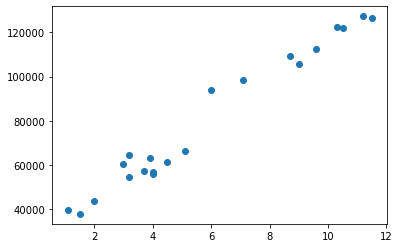

In [6]:
# Visualize training set
plt.scatter(X_train, y_train)

In [7]:
# Output values
y_test

array([[ 39891],
       [139465],
       [ 81363],
       [101302],
       [ 83088],
       [ 91738],
       [ 67938],
       [116969],
       [ 57081],
       [128765],
       [ 56642],
       [113812],
       [135675],
       [ 46205]])

In [8]:
# Fit training set to our model
model = LinearRegression(n_iterations=1000, learning_rate = 0.043)
model.fit(X_train, y_train)

In [9]:
# Predict our output 
y_pred = model.predict(X_test)
y_pred

array([[ 46724.19272127],
       [149136.91039272],
       [ 80257.5604544 ],
       [ 98383.70517501],
       [ 74819.71703822],
       [ 88414.32557867],
       [ 71194.48809409],
       [112884.6209515 ],
       [ 63944.03020585],
       [138261.22356036],
       [ 53068.34337348],
       [101102.6268831 ],
       [143699.06697654],
       [ 38567.42759699]])

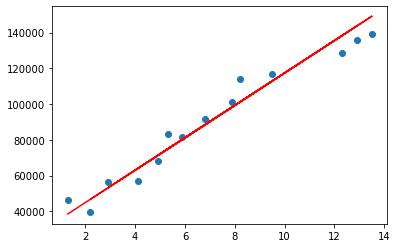

In [10]:
#Visualize test input and predict output
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = "red")

In [11]:
# Fit training set to sklearn model
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Predict sklearn output 
y_pred1 = model1.predict(X_test)
y_pred1

array([[ 46724.7640388 ],
       [149136.2607045 ],
       [ 80257.73197359],
       [ 98383.66058699],
       [ 74819.95338957],
       [ 88414.39984962],
       [ 71194.76766689],
       [112884.4034777 ],
       [ 63944.39622153],
       [138260.70353646],
       [ 53068.83905349],
       [101102.549879  ],
       [143698.48212048],
       [ 38568.09616277]])

In [13]:
# Compare our weights to sklearn weights
print('My model: ', model.w)
print('Sckit learn: ', model1.intercept_, model1.coef_)

My model:  [[26785.4335286 ]
 [ 9063.07236031]]
Sckit learn:  [26786.24256407] [[9062.9643067]]


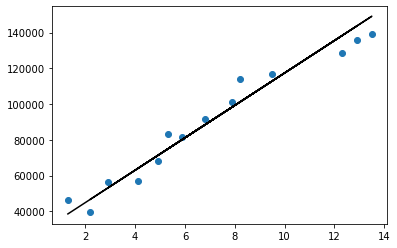

In [14]:
#Visualize test input and sklearn predict output
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred1, color = "black")